In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('50_Startups.csv')

In [15]:
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


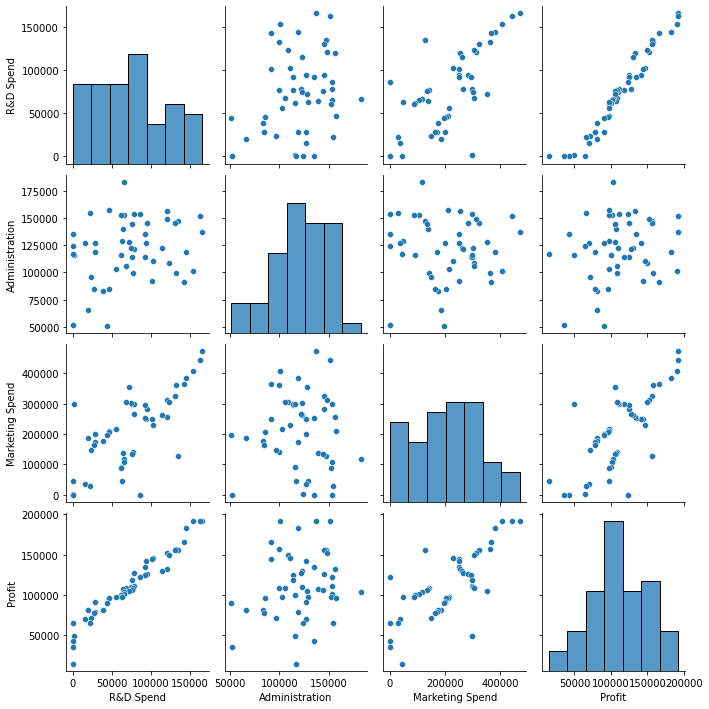

In [17]:
sns.pairplot(df)

C:\Users\ali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

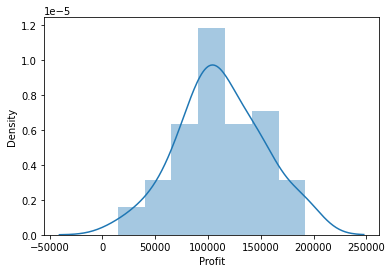

In [18]:
sns.distplot(df["Profit"])

<AxesSubplot:>

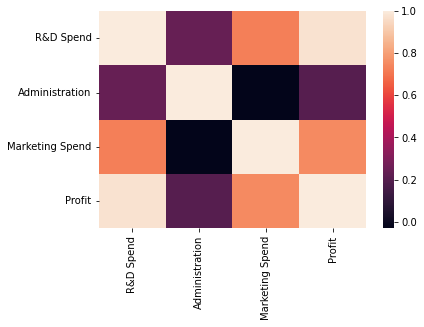

In [19]:
sns.heatmap(df.corr())

In [20]:
df["State"].nunique()

3

In [21]:
state = pd.get_dummies(df['State'],drop_first=True)

In [22]:
df.drop(['State'],axis=1,inplace=True)

In [23]:
df = pd.concat([df,state],axis=1)

In [24]:
df.head()

R&D Spend  Administration  Marketing Spend     Profit  Florida  New York
0  165349.20       136897.80        471784.10  192261.83        0         1
1  162597.70       151377.59        443898.53  191792.06        0         0
2  153441.51       101145.55        407934.54  191050.39        1         0
3  144372.41       118671.85        383199.62  182901.99        0         1
4  142107.34        91391.77        366168.42  166187.94        1         0

In [25]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend',
               'Florida', 'New York']]
y = df['Profit']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
print(lm.intercept_)

43035.40353050361


In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
R&D Spend           0.814327
Administration      0.015357
Marketing Spend     0.028032
Florida          6192.880372
New York         1134.530034

In [33]:
predictions = lm.predict(X_test)

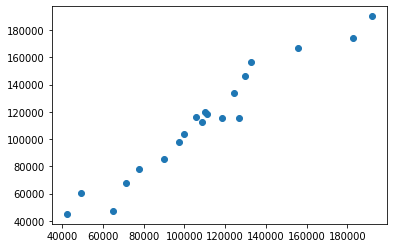

In [34]:
plt.scatter(y_test,predictions)

C:\Users\ali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


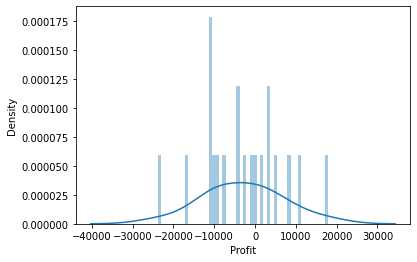

In [35]:
sns.distplot((y_test-predictions),bins=50);

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8090.678977854501
MSE: 102686697.13921595
RMSE: 10133.444485426264
